In [1]:
pip install pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#importing required librariries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pyod.models.knn import KNN
from pyod.utils.data import generate_data , get_outliers_inliers

In [3]:
#creating random data with two columns
X_train, y_train = generate_data(n_train=300, train_only=True, n_features=2)

outlier_fraction = 0.1 

X_outliers, X_inliers = get_outliers_inliers(X_train, y_train)
n_inliers = len(X_inliers)
n_outliers = len(X_outliers)

f1 = X_train[:, [0]].reshape(-1,1)
f2 = X_train[:, [1]].reshape(-1,1)

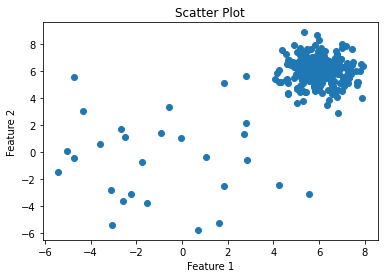

In [4]:
#visualisation
xx, yy = np.meshgrid(np.linspace(-10, 10,200), np.linspace(-10, 10, 200))
plt.scatter(f1, f2)
plt.title("Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
#Training and Evaluation of Model
clf = KNN(contamination = outlier_fraction)
clf.fit(X_train, y_train)

scores_predict = clf.decision_function(X_train)*-1

y_predict = clf.predict(X_train)
n_errors = (y_predict == y_train).sum()

print("The Number of prediction errors are: ", n_errors)

The Number of prediction errors are:  295


/usr/local/lib/python3.8/dist-packages/pyod/models/base.py:431: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


<ipython-input-6-43be58799356>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  subplot = plt.subplot(1, 2, 1)


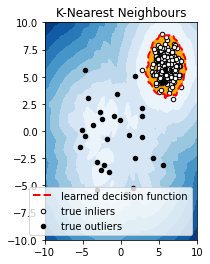

In [6]:
#Visualising the Predictions
threshold = stats.scoreatpercentile(scores_predict, 100 * outlier_fraction)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

subplot = plt.subplot(1,2,1)
subplot.contourf(xx, yy, Z,  levels = np.linspace(Z.min(), threshold, 10), cmap = plt.cm.Blues_r)

subplot = plt.subplot(1, 2, 1)
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10), cmap = plt.cm.Blues_r)

a = subplot.contour(xx, yy, Z, levels =[threshold], linewidths = 2, colors ='red')

subplot.contourf(xx, yy, Z, levels =[threshold, Z.max()], colors ='orange')

b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c ='white', s = 20, edgecolor ='k')

c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c ='black', s = 20, edgecolor ='k')
subplot.axis('tight')
 
subplot.legend([a.collections[0], b, c], ['learned decision function', 'true inliers', 'true outliers'], prop = matplotlib.font_manager.FontProperties(size = 10), loc ='lower right')
 
subplot.set_title('K-Nearest Neighbours')
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))
plt.show()